# Import Library:

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Import Data:

In [80]:
df = pd.read_csv('apple_income_statement.csv')
df

,Unnamed: 0,2012-12-31,2013-12-31,2014-12-31,2015-12-31,2016-12-31,2017-12-31,2018-12-31,2019-12-31,2020-12-31,2021-12-31
0,Cash,0,0,0,0,0,0,0,0,0,0
1,Cash & Equivalents,5490,6081,7341,6460,7168,8261,7857,8284,9352,9254
2,Short Term Investments,29,14,0,0,0,0,1,0,0,0
3,Cash and Short Term Investments,5519,6095,7341,6460,7168,8261,7858,8284,9352,9254
4,"Accounts Receivable - Trade, Net",8831,8326,7699,6677,5919,7376,8767,8484,7317,8477
5,"Total Receivables, Net",8831,17089,16726,15668,14441,16133,17417,17820,16780,17375
6,Total Inventory,15547,12625,12205,9700,8614,10018,11529,11266,11402,14038
7,"Other Current Assets, Total",11253,1626,1777,18,62,60,34,84,0,0
8,Total Current Assets,42138,38335,38867,33508,31967,36244,38603,39193,39464,43455
9,"Property/Plant/Equipment, Total - Gross",29932,0,31572,31977,31940,31538,29781,29841,29874,29496


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  31 non-null     object
 1   2012-12-31  31 non-null     int64 
 2   2013-12-31  31 non-null     int64 
 3   2014-12-31  31 non-null     int64 
 4   2015-12-31  31 non-null     int64 
 5   2016-12-31  31 non-null     int64 
 6   2017-12-31  31 non-null     int64 
 7   2018-12-31  31 non-null     int64 
 8   2019-12-31  31 non-null     int64 
 9   2020-12-31  31 non-null     int64 
 10  2021-12-31  31 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 2.8+ KB


In [82]:
df.shape

(31, 11)

# Data Cleaning:

In [83]:
df.isnull().sum()

Unnamed: 0    0
2012-12-31    0
2013-12-31    0
2014-12-31    0
2015-12-31    0
2016-12-31    0
2017-12-31    0
2018-12-31    0
2019-12-31    0
2020-12-31    0
2021-12-31    0
dtype: int64

In [84]:
df.rename(columns={"Unnamed: 0": "Year"}, inplace=True)
for i in range(2012,2022):
    df.rename(columns={f'{i}-12-31': i}, inplace=True)
df.head()

,Year,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Cash,0,0,0,0,0,0,0,0,0,0
1,Cash & Equivalents,5490,6081,7341,6460,7168,8261,7857,8284,9352,9254
2,Short Term Investments,29,14,0,0,0,0,1,0,0,0
3,Cash and Short Term Investments,5519,6095,7341,6460,7168,8261,7858,8284,9352,9254
4,"Accounts Receivable - Trade, Net",8831,8326,7699,6677,5919,7376,8767,8484,7317,8477


In [85]:
df=df.T
df.columns = df.iloc[0]
df.drop("Year", inplace=True)
df

Year,Cash,Cash & Equivalents,Short Term Investments,Cash and Short Term Investments,"Accounts Receivable - Trade, Net","Total Receivables, Net",Total Inventory,"Other Current Assets, Total",Total Current Assets,"Property/Plant/Equipment, Total - Gross",...,Total Long Term Debt,Total Debt,"Other Liabilities, Total",Total Liabilities,"Common Stock, Total",Retained Earnings (Accumulated Deficit),Unrealized Gain (Loss),"Other Equity, Total",Total Equity,Total Liabilities & Shareholders' Equity
2012,0,5490,29,5519,8831,8831,15547,11253,42138,29932,...,27752,40143,14221,71438,4481,0,67,-6500,17532,88970
2013,0,6081,14,6095,8326,17089,12625,1626,38335,0,...,26719,37750,10002,64085,4709,0,83,-3981,20811,84896
2014,0,7341,0,7341,7699,16726,12205,1777,38867,31572,...,27784,39285,12194,67935,5016,0,83,-6514,16746,84681
2015,0,6460,0,6460,6677,15668,9700,18,33508,31977,...,25169,38013,12046,63533,5238,0,37,-2072,14809,78342
2016,0,7168,0,7168,5919,14441,8614,62,31967,31940,...,22818,36783,12541,61567,5277,0,32,-2071,13137,74704
2017,0,8261,0,8261,7376,16133,10018,60,36244,31538,...,23847,34878,12418,63265,5593,0,8,-1200,13697,76962
2018,0,7857,1,7858,8767,17417,11529,34,38603,29781,...,25000,36553,11211,64470,5827,0,-15,-1669,14039,78509
2019,0,8284,0,8284,8484,17820,11266,84,39193,29841,...,26281,37657,10922,63865,5935,0,20,-1587,14588,78453
2020,0,9352,0,9352,7317,16780,11402,0,39464,29874,...,25999,37163,11230,62993,6230,0,54,-942,15331,78324
2021,0,9254,0,9254,8477,17375,14038,0,43455,29496,...,26033,37789,10397,66309,6398,0,20,-1573,16484,82793


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 2012 to 2021
Data columns (total 31 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Cash                                      10 non-null     object
 1   Cash & Equivalents                        10 non-null     object
 2   Short Term Investments                    10 non-null     object
 3   Cash and Short Term Investments           10 non-null     object
 4   Accounts Receivable - Trade, Net          10 non-null     object
 5   Total Receivables, Net                    10 non-null     object
 6   Total Inventory                           10 non-null     object
 7   Other Current Assets, Total               10 non-null     object
 8   Total Current Assets                      10 non-null     object
 9   Property/Plant/Equipment, Total - Gross   10 non-null     object
 10  Accumulated Depreciation, Total           10 non-nul

# Result:

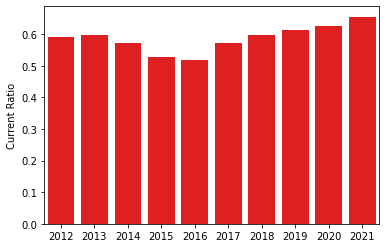

In [87]:
df['Current Ratio'] = df['Total Current Assets'] / df['Total Liabilities']
sns.barplot(y = df['Current Ratio'], x = df.index, color = 'red');

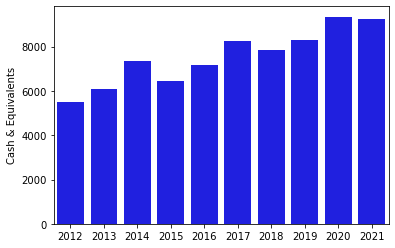

In [88]:
sns.barplot(y=df['Cash & Equivalents'], x=df.index, color="blue");

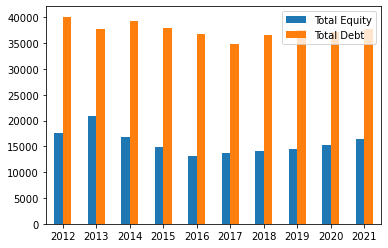

In [89]:
TotalEquity = df['Total Equity']
TotalDebt = df['Total Debt']
df_new = pd.DataFrame({'Total Equity': TotalEquity,
                   'Total Debt': TotalDebt})
ax = df_new.plot.bar(rot=0)

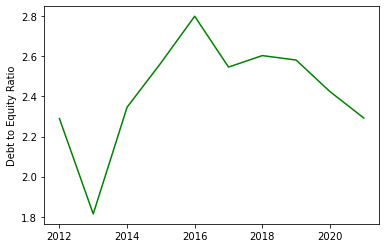

In [90]:
df['Debt to Equity Ratio'] = df['Total Debt'] / df['Total Equity']
sns.lineplot(y = df["Debt to Equity Ratio"], x = df.index, color = "green");

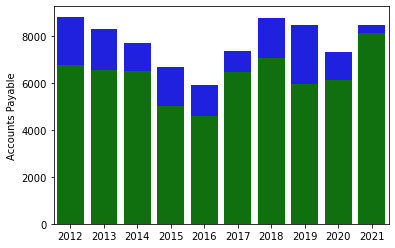

In [101]:
sns.barplot(y = df["Accounts Receivable - Trade, Net"], x = df.index, color="blue")
sns.barplot(y = df["Accounts Payable"], x = df.index, color="green");

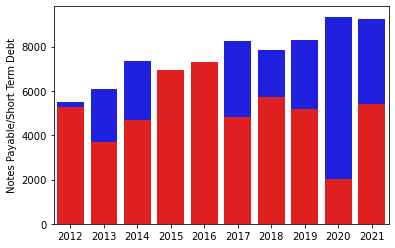

In [102]:
sns.barplot(y = df["Cash and Short Term Investments"] , x=df.index, color="blue")
sns.barplot(y = df["Notes Payable/Short Term Debt"], x=df.index, color="red");

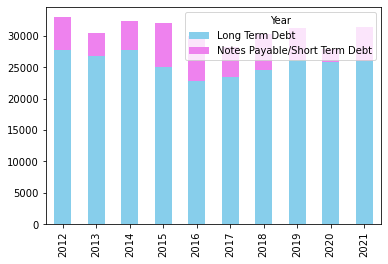

In [105]:
debts = df[["Long Term Debt", "Notes Payable/Short Term Debt"]]
debts.plot(kind='bar', stacked=True, color=['skyblue', 'violet']);

# SIUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUU !!!